In [23]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import cape_expected_returns as cape_er
%matplotlib inline

In [24]:
output = []
allocation = 0.5
mix = pd.DataFrame({
    'Return': allocation * cape_er.stock.Return + (1-allocation) * cape_er.bond.Return, 
    'percentage': allocation * cape_er.stock.percentage + (1-allocation) * cape_er.bond.percentage, 
    'Inflation': cape_er.inflation.Inflation2, 
})
for gap in 1, 5, 10, 20:
    for i in range(len(mix) - 20):
        total = 0
        totalCash = 0
        for r in mix[i:i+gap].itertuples():
            total = (total + 1) * r.Return
            totalCash = (totalCash + 1) / r.Inflation
        output.append([gap, cape_er.stock.Start[i], total, totalCash, total / totalCash])
output = pd.DataFrame(output, columns = ['Period', 'Start', 'Total', 'Total Cash', 'Ratio']).set_index('Start')

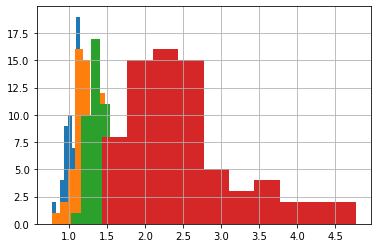

In [25]:
grouped = output.groupby('Period').Ratio
grouped.hist()
grouped = grouped.agg(['mean', 'median', 'max', 'min', 'std'])

In [26]:
grouped

,mean,median,max,min,std
Period,,,,,
1,1.088781,1.103981,1.311136,0.780748,0.115375
5,1.289958,1.263578,1.775320,0.789618,0.194410
10,1.603984,1.523431,2.332097,1.027409,0.324531
20,2.523748,2.339538,4.771070,1.438870,0.738842


<AxesSubplot:xlabel='Start'>

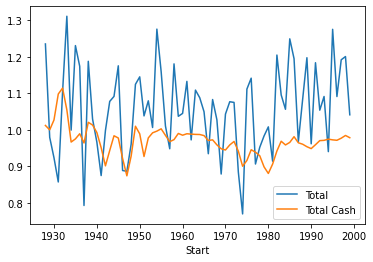

In [27]:
output.query('Period == 1')[['Total', 'Total Cash']].plot()

<AxesSubplot:xlabel='Start'>

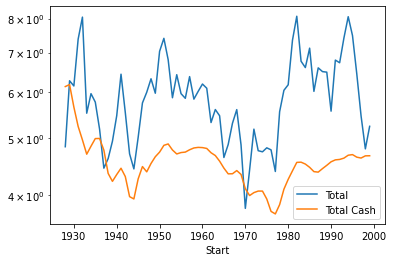

In [31]:
output.query('Period == 5')[['Total', 'Total Cash']].plot(logy=True)

<AxesSubplot:xlabel='Start'>

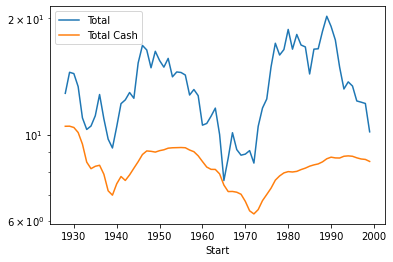

In [32]:
output.query('Period == 10')[['Total', 'Total Cash']].plot(logy=True)

<AxesSubplot:xlabel='Start'>

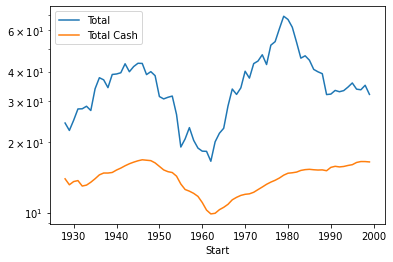

In [33]:
output.query('Period == 20')[['Total', 'Total Cash']].plot(logy=True)